In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv('bird-gps.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263718 entries, 0 to 263717
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      263718 non-null  int64  
 1   lat             263718 non-null  float64
 2   lon             263718 non-null  float64
 3   alt             263718 non-null  float64
 4   unix            263718 non-null  int64  
 5   bird            263718 non-null  int64  
 6   species         263718 non-null  object 
 7   year            263718 non-null  object 
 8   date_time       263718 non-null  object 
 9   max_depth.m     263718 non-null  float64
 10  colony2         263718 non-null  int64  
 11  coverage_ratio  262648 non-null  float64
 12  is_dive         263718 non-null  bool   
 13  is_dive_1m      263718 non-null  bool   
 14  is_dive_2m      263718 non-null  bool   
 15  is_dive_4m      263718 non-null  bool   
 16  is_dive_5m      263718 non-null  bool   
 17  is_dive_0m

In [5]:
data.shape

(263718, 18)

In [6]:
data.columns

Index(['Unnamed: 0', 'lat', 'lon', 'alt', 'unix', 'bird', 'species', 'year',
       'date_time', 'max_depth.m', 'colony2', 'coverage_ratio', 'is_dive',
       'is_dive_1m', 'is_dive_2m', 'is_dive_4m', 'is_dive_5m', 'is_dive_0m'],
      dtype='object')

In [7]:
data.describe()

,Unnamed: 0,lat,lon,alt,unix,bird,max_depth.m,colony2,coverage_ratio
count,263718.000000,263718.000000,263718.000000,263718.000000,2.637180e+05,263718.000000,263718.000000,263718.000000,262648.000000
mean,131859.500000,56.580051,-4.234669,23.743436,1.359405e+09,53.508103,2.031185,4.063989,0.569349
std,76128.973483,2.476717,1.854708,249.990511,2.821933e+07,32.627900,13.735655,3.111499,0.349948
min,1.000000,51.468828,-6.749091,-482.654556,1.306926e+09,1.000000,-10.329966,1.000000,0.000000
25%,65930.250000,56.088568,-6.230647,-0.129882,1.339011e+09,25.000000,-1.407241,1.000000,0.200000
50%,131859.500000,56.255339,-5.301294,8.889465,1.368729e+09,49.000000,-0.581252,2.000000,0.800000
75%,197788.750000,58.691067,-2.664804,25.936559,1.372852e+09,83.000000,0.887174,6.000000,0.900000
max,263718.000000,59.824936,-1.042002,9839.139371,1.404837e+09,108.000000,250.468539,10.000000,1.100000


In [8]:
data.head(10)

,Unnamed: 0,lat,lon,alt,unix,bird,species,year,date_time,max_depth.m,colony2,coverage_ratio,is_dive,is_dive_1m,is_dive_2m,is_dive_4m,is_dive_5m,is_dive_0m
0,1,56.095451,-6.233089,-23.059999,1340627854,1,tCOGU,t2012,2012-06-25 13:37:34,-2.172046,1,0.5,False,False,False,False,False,False
1,2,56.095408,-6.233520,-2.983077,1340627954,1,tCOGU,t2012,2012-06-25 13:39:14,-1.152306,1,0.6,False,False,False,False,False,False
2,3,56.095437,-6.234275,3.470286,1340628054,1,tCOGU,t2012,2012-06-25 13:40:54,-2.172046,1,0.7,False,False,False,False,False,False
3,4,56.095635,-6.234815,1.902667,1340628154,1,tCOGU,t2012,2012-06-25 13:42:34,-2.172046,1,0.8,False,False,False,False,False,False
4,5,56.095821,-6.235293,2.824952,1340628254,1,tCOGU,t2012,2012-06-25 13:44:14,-2.172046,1,0.9,False,False,False,False,False,False
5,6,56.096040,-6.235532,8.344950,1340628354,1,tCOGU,t2012,2012-06-25 13:45:54,-2.172046,1,0.8,False,False,False,False,False,False
6,7,56.096387,-6.236286,11.280000,1340628454,1,tCOGU,t2012,2012-06-25 13:47:34,-2.172046,1,0.8,False,False,False,False,False,False
7,8,56.096636,-6.236554,8.131121,1340628554,1,tCOGU,t2012,2012-06-25 13:49:14,-1.152306,1,0.8,False,False,False,False,False,False
8,9,56.096779,-6.236809,-0.466415,1340628654,1,tCOGU,t2012,2012-06-25 13:50:54,-2.172046,1,0.7,False,False,False,False,False,False
9,10,56.096908,-6.237055,-8.093939,1340628754,1,tCOGU,t2012,2012-06-25 13:52:34,-2.172046,1,0.7,False,False,False,False,False,False


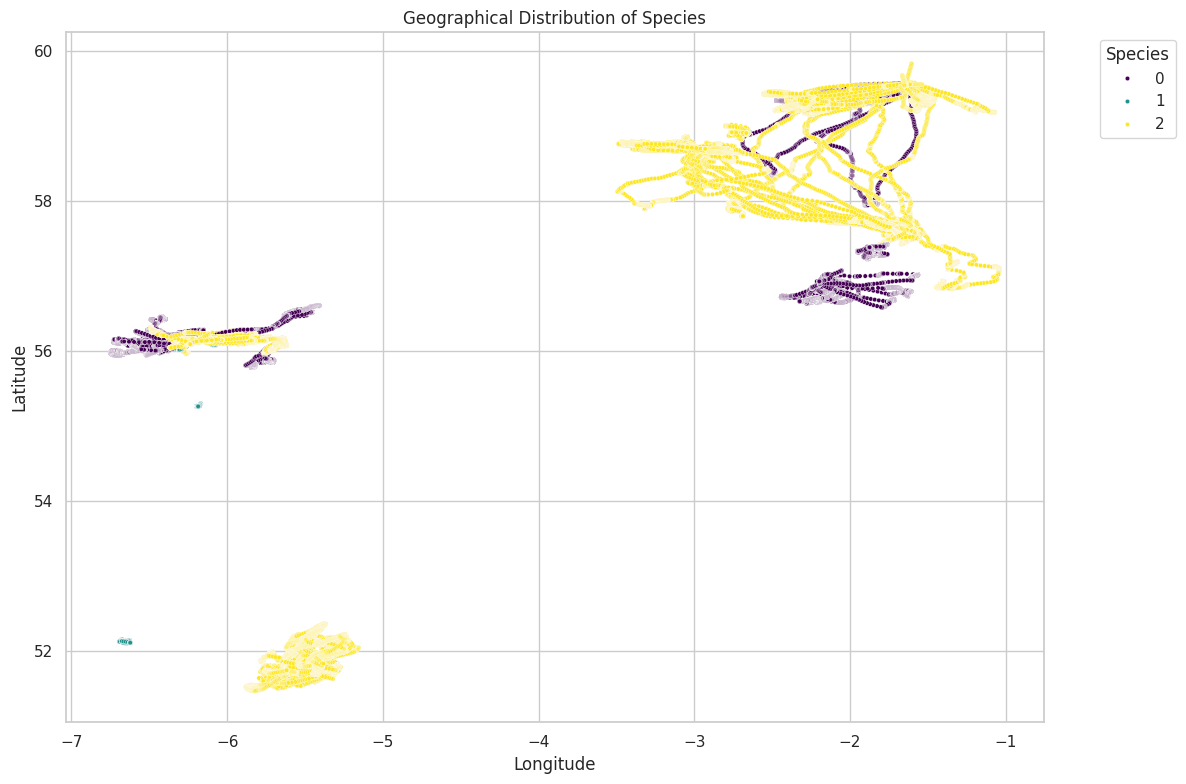

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Scatter plot of latitude and longitude, colored by species
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='lon', y='lat', hue='species', palette='viridis', s=10)
plt.title('Geographical Distribution of Species')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

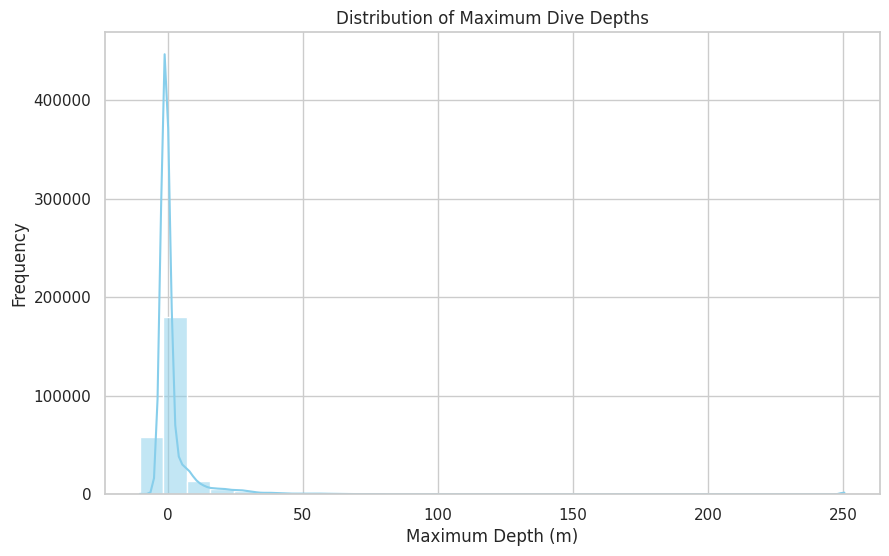

In [38]:
#Histogram of dive depths
plt.figure(figsize=(10, 6))
sns.histplot(data['max_depth.m'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Maximum Dive Depths')
plt.xlabel('Maximum Depth (m)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-39-c56173535a98>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='species', data=data, palette='pastel')


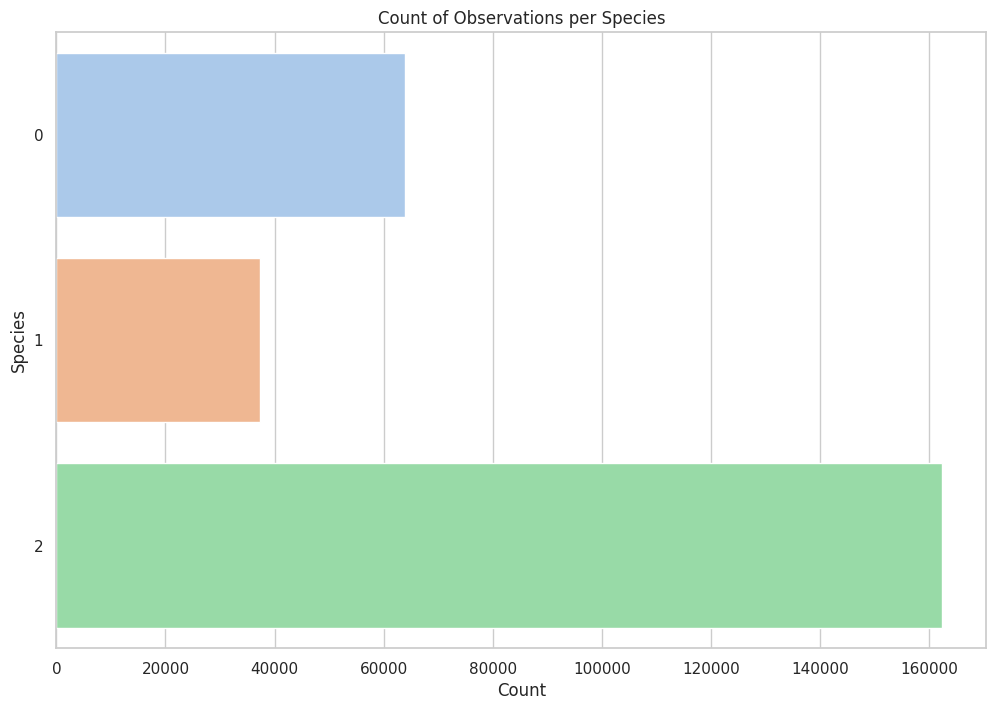

In [39]:
#Count plot of bird species
plt.figure(figsize=(12, 8))
sns.countplot(y='species', data=data, palette='pastel')
plt.title('Count of Observations per Species')
plt.xlabel('Count')
plt.ylabel('Species')
plt.show()

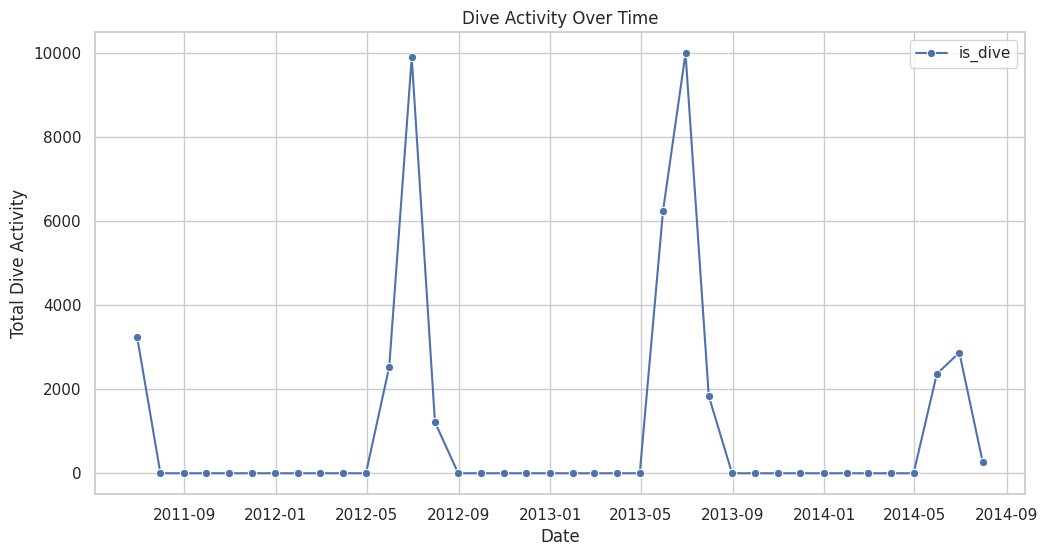

In [41]:
#Line plot of dive activity over time
data['date_time'] = pd.to_datetime(data['date_time'])
data_time_series = data.set_index('date_time').resample('M').sum()
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_time_series[['is_dive']], marker='o', dashes=False)
plt.title('Dive Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Dive Activity')
plt.show()

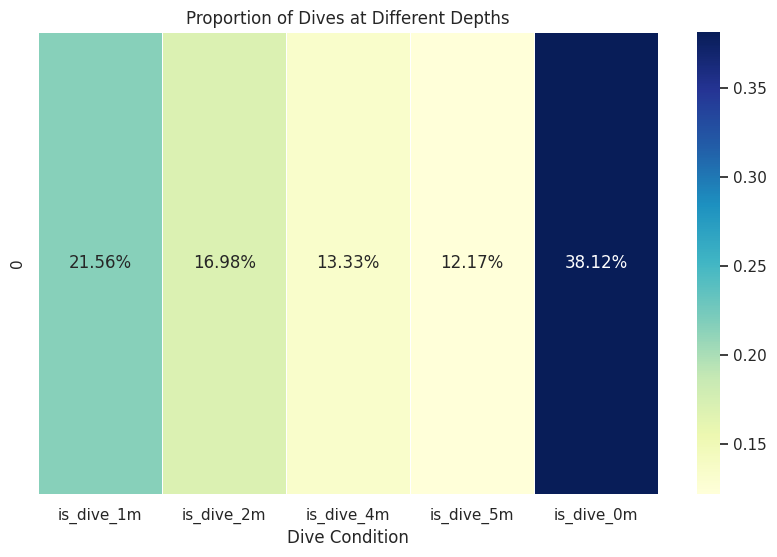

In [43]:
#Heatmap of dive conditions
dive_conditions = data[['is_dive_1m', 'is_dive_2m', 'is_dive_4m', 'is_dive_5m', 'is_dive_0m']].mean().to_frame().T
plt.figure(figsize=(10, 6))
sns.heatmap(dive_conditions, annot=True, cmap='YlGnBu', cbar=True, fmt='.2%', linewidths=.5)
plt.title('Proportion of Dives at Different Depths')
plt.xlabel('Dive Condition')
plt.ylabel('')
plt.show()

Dive Prediction Model using Logistic Regression

Objective: Predict whether a bird will dive at a given time or location.

In [9]:
data["coverage_ratio"].fillna(data["coverage_ratio"].mean(), inplace=True)

data["date_time"] = pd.to_datetime(data["date_time"])

# Extract features from datetime
data["year"] = data["date_time"].dt.year
data["month"] = data["date_time"].dt.month
data["day"] = data["date_time"].dt.day
data["hour"] = data["date_time"].dt.hour

# Print summary of preprocessed data
print(data.describe())

          Unnamed: 0            lat            lon            alt  \
count  263718.000000  263718.000000  263718.000000  263718.000000   
mean   131859.500000      56.580051      -4.234669      23.743436   
min         1.000000      51.468828      -6.749091    -482.654556   
25%     65930.250000      56.088568      -6.230647      -0.129882   
50%    131859.500000      56.255339      -5.301294       8.889465   
75%    197788.750000      58.691067      -2.664804      25.936559   
max    263718.000000      59.824936      -1.042002    9839.139371   
std     76128.973483       2.476717       1.854708     249.990511   

               unix           bird           year                   date_time  \
count  2.637180e+05  263718.000000  263718.000000                      263718   
mean   1.359405e+09      53.508103    2012.632482  2013-01-28 21:27:47.184640   
min    1.306926e+09       1.000000    2011.000000         2011-06-01 12:00:03   
25%    1.339011e+09      25.000000    2012.000000     

In [30]:
# Convert categorical columns to numeric
data["species"] = data["species"].astype('category').cat.codes

# Select features and target
features = ["lat", "lon", "alt", "unix", "bird", "species", "year", "month", "day", "hour", "max_depth.m", "colony2", "coverage_ratio"]
target = "is_dive"

# Split the data into train and test sets
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9993932959199151
Confusion Matrix:
[[44691     1]
 [   31  8021]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     44692
        True       1.00      1.00      1.00      8052

    accuracy                           1.00     52744
   macro avg       1.00      1.00      1.00     52744
weighted avg       1.00      1.00      1.00     52744



Time Series Forecasting using Neural Prophet

Objective: Forecast future values of bird activity metrics such as maximum depth or coverage ratio over time.

In [35]:
pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 54.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.wh

In [46]:
import pandas as pd
from neuralprophet import NeuralProphet

data["date_time"] = pd.to_datetime(data["date_time"])

df = data[["date_time", "max_depth.m"]].rename(columns={"date_time": "ds", "max_depth.m": "y"})

df = df.groupby('ds').y.mean().reset_index()

model = NeuralProphet()

model.fit(df, freq='H')

future = model.make_future_dataframe(df, periods=365)

forecast = model.predict(future)

print(forecast.columns)

print(forecast[['ds', 'yhat1']])

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency 100S corresponds to 21.697% of the data.
INFO:NP.df_utils:Major frequency 100S corresponds to 21.697% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 512
INFO:NP.config:Auto-set batch_size to 512
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 20
INFO:NP.config:Auto-set epochs to 20


Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/285 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency 100S corresponds to 21.697% of the data.
INFO:NP.df_utils:Major frequency 100S corresponds to 21.697% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.726% of the data.

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


Index(['ds', 'y', 'yhat1', 'trend', 'season_yearly', 'season_weekly',
       'season_daily'],
      dtype='object')
                     ds     yhat1
0   2014-07-08 18:29:14 -0.166096
1   2014-07-08 19:29:14 -0.182240
2   2014-07-08 20:29:14  0.025810
3   2014-07-08 21:29:14  0.260579
4   2014-07-08 22:29:14  0.151418
..                  ...       ...
360 2014-07-23 18:29:14 -6.613670
361 2014-07-23 19:29:14 -6.647123
362 2014-07-23 20:29:14 -6.470868
363 2014-07-23 21:29:14 -6.250013
364 2014-07-23 22:29:14 -6.377039

[365 rows x 2 columns]


In [47]:
import plotly.offline as py

# Plot the forecast
fig_forecast = model.plot(forecast)
py.iplot(fig_forecast)

# Plot the forecast components
fig_components = model.plot_components(forecast)
py.iplot(fig_components)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
